In [60]:
!pip install mlxtend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 49.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import random
from sklearn import preprocessing, model_selection, neighbors
# from sklearn.svm import LinearSVC, SVC
# from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from mlxtend.preprocessing import shuffle_arrays_unison
from sklearn.metrics import accuracy_score

In [3]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [4]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "Age","Fare"]

In [6]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [7]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
df_train['Age'].fillna(df_train['Age'].mean(),inplace=True)
df_test['Age'].fillna(df_test['Age'].mean(),inplace=True)

In [10]:
df_train.drop(columns=['Cabin','Ticket',"Name","PassengerId"],axis=1,inplace=True)
df_test.drop(columns=['Cabin','Ticket',"Name","PassengerId"],axis=1,inplace=True)


In [11]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
5,0,3,male,29.699118,0,0,8.4583,Q
6,0,1,male,54.000000,0,0,51.8625,S
7,0,3,male,2.000000,3,1,21.0750,S
8,1,3,female,27.000000,0,2,11.1333,S
9,1,2,female,14.000000,1,0,30.0708,C


In [12]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.50000,0,0,7.8292,Q
1,3,female,47.00000,1,0,7.0000,S
2,2,male,62.00000,0,0,9.6875,Q
3,3,male,27.00000,0,0,8.6625,S
4,3,female,22.00000,1,1,12.2875,S
5,3,male,14.00000,0,0,9.2250,S
6,3,female,30.00000,0,0,7.6292,Q
7,2,male,26.00000,1,1,29.0000,S
8,3,female,18.00000,0,0,7.2292,C
9,3,male,21.00000,2,0,24.1500,S


In [13]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
# mapp={"S":0,"1":2,"Q":3}
# df_test['Embarked']=df_test['Embarked'].map(mapp)
# df_train['Embarked']=df_train['Embarked'].map(mapp)

In [15]:
mapp2={"male":1,"female":0}
df_test['Sex']=df_test['Sex'].map(mapp2)
df_train['Sex']=df_train['Sex'].map(mapp2)

In [16]:
df_train["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

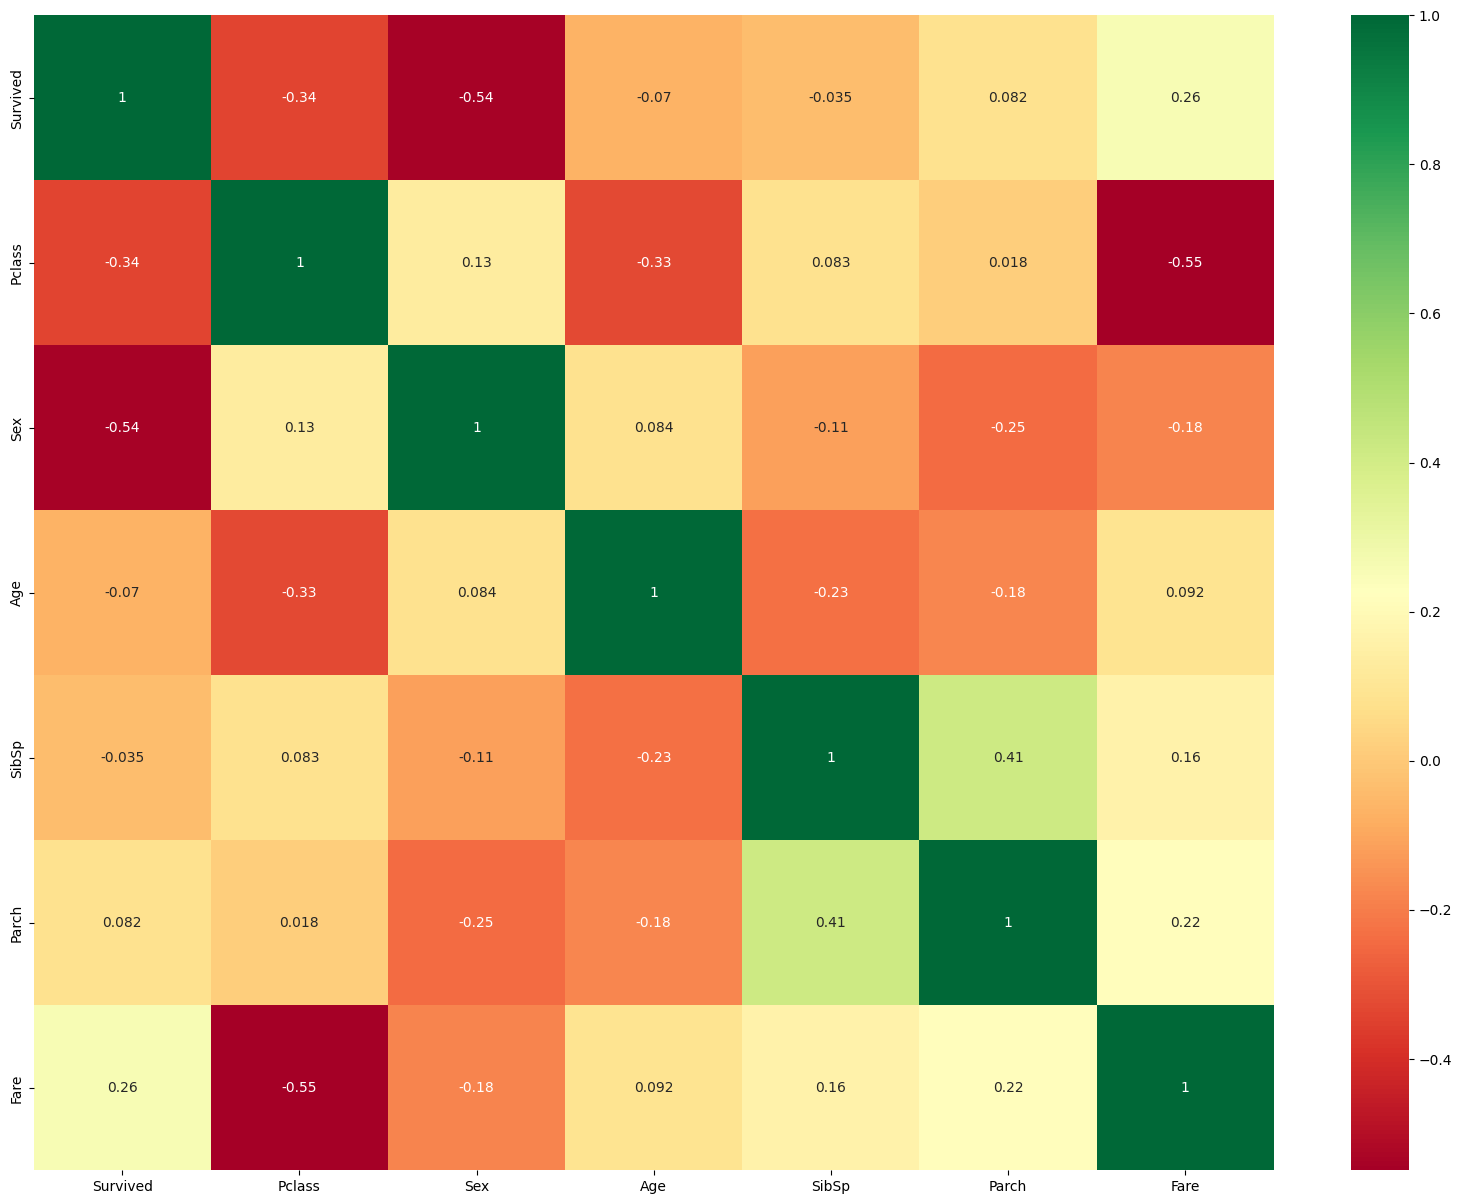

In [17]:
plt.figure(figsize=(20,15))
sns.heatmap(df_train.corr(),annot=True,cmap="RdYlGn")
plt.show()

<AxesSubplot:>

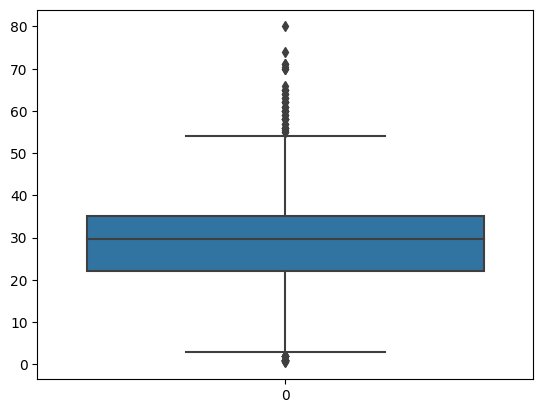

In [18]:
sns.boxplot(df_train.iloc[:,3])

In [19]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,S
1,1,1,0,38.000000,1,0,71.2833,C
2,1,3,0,26.000000,0,0,7.9250,S
3,1,1,0,35.000000,1,0,53.1000,S
4,0,3,1,35.000000,0,0,8.0500,S
5,0,3,1,29.699118,0,0,8.4583,Q
6,0,1,1,54.000000,0,0,51.8625,S
7,0,3,1,2.000000,3,1,21.0750,S
8,1,3,0,27.000000,0,2,11.1333,S
9,1,2,0,14.000000,1,0,30.0708,C


In [20]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,Q
1,3,0,47.00000,1,0,7.0000,S
2,2,1,62.00000,0,0,9.6875,Q
3,3,1,27.00000,0,0,8.6625,S
4,3,0,22.00000,1,1,12.2875,S
5,3,1,14.00000,0,0,9.2250,S
6,3,0,30.00000,0,0,7.6292,Q
7,2,1,26.00000,1,1,29.0000,S
8,3,0,18.00000,0,0,7.2292,C
9,3,1,21.00000,2,0,24.1500,S


In [21]:
df_train.drop("Embarked",axis=1,inplace=True)

In [22]:
# dummies_Embarked=pd.DataFrame(pd.get_dummies(df_train['Embarked']))
# df_train.drop("Embarked",inplace=True,axis=1)
# df_train=pd.concat([dummies_Embarked,df_train],axis=1)

In [23]:
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.000000,1,0,7.2500
1,1,1,0,38.000000,1,0,71.2833
2,1,3,0,26.000000,0,0,7.9250
3,1,1,0,35.000000,1,0,53.1000
4,0,3,1,35.000000,0,0,8.0500
5,0,3,1,29.699118,0,0,8.4583
6,0,1,1,54.000000,0,0,51.8625
7,0,3,1,2.000000,3,1,21.0750
8,1,3,0,27.000000,0,2,11.1333
9,1,2,0,14.000000,1,0,30.0708


In [24]:
df_test.drop("Embarked",axis=1,inplace=True)

In [25]:
# dummies_Embarked_test=pd.DataFrame(pd.get_dummies(df_test['Embarked']))
# df_test.drop("Embarked",inplace=True,axis=1)
# df_test=pd.concat([dummies_Embarked_test,df_test],axis=1)

In [26]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.50000,0,0,7.8292
1,3,0,47.00000,1,0,7.0000
2,2,1,62.00000,0,0,9.6875
3,3,1,27.00000,0,0,8.6625
4,3,0,22.00000,1,1,12.2875
5,3,1,14.00000,0,0,9.2250
6,3,0,30.00000,0,0,7.6292
7,2,1,26.00000,1,1,29.0000
8,3,0,18.00000,0,0,7.2292
9,3,1,21.00000,2,0,24.1500


In [27]:
df_train.dropna(inplace=True)

In [28]:
df_test.dropna(inplace=True)

In [33]:
scaler=scaler=MinMaxScaler()
df_train=pd.DataFrame(scaler.fit_transform(df_train),columns=df_train.columns,)
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.0,1.0,1.0,0.271174,0.125,0.000000,0.014151
1,1.0,0.0,0.0,0.472229,0.125,0.000000,0.139136
2,1.0,1.0,0.0,0.321438,0.000,0.000000,0.015469
3,1.0,0.0,0.0,0.434531,0.125,0.000000,0.103644
4,0.0,1.0,1.0,0.434531,0.000,0.000000,0.015713
5,0.0,1.0,1.0,0.367921,0.000,0.000000,0.016510
6,0.0,0.0,1.0,0.673285,0.000,0.000000,0.101229
7,0.0,1.0,1.0,0.019854,0.375,0.166667,0.041136
8,1.0,1.0,0.0,0.334004,0.000,0.333333,0.021731
9,1.0,0.5,0.0,0.170646,0.125,0.000000,0.058694


In [34]:
scaler=scaler=MinMaxScaler()
df_test=pd.DataFrame(scaler.fit_transform(df_test),columns=df_test.columns,)
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare
0,1.0,1.0,0.452723,0.000,0.000000,0.015282
1,1.0,0.0,0.617566,0.125,0.000000,0.013663
2,0.5,1.0,0.815377,0.000,0.000000,0.018909
3,1.0,1.0,0.353818,0.000,0.000000,0.016908
4,1.0,0.0,0.287881,0.125,0.111111,0.023984
5,1.0,1.0,0.182382,0.000,0.000000,0.018006
6,1.0,0.0,0.393380,0.000,0.000000,0.014891
7,0.5,1.0,0.340630,0.125,0.111111,0.056604
8,1.0,0.0,0.235131,0.000,0.000000,0.014110
9,1.0,1.0,0.274693,0.250,0.000000,0.047138


In [35]:
X=np.array(df_train.drop("Survived",axis=1)).astype('int64')
Y=np.array(df_train['Survived']).astype('int64')

In [36]:
X.dtype

dtype('int64')

In [37]:
X,Y=shuffle_arrays_unison(arrays=[X,Y],random_seed=3)

In [38]:

X_train,X_eval,Y_train,Y_eval=model_selection.train_test_split(X,Y,test_size=0.2,random_state=42)

In [39]:
X_eval

array([[1, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       ...,
       [1, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]], dtype=int64)

In [40]:
np_array_of_test=np.array(df_test)


In [41]:
class DecisionTree:
    
    def __init__(self, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.criterion = criterion
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.tree = None
        
    def _leaf_value(self, y):
    # return the most common class label in y
        counts = np.bincount(y)
        return np.argmax(counts)

        
    def fit(self, X, y):
        self.tree = self._grow_tree(X, y)
        
    def predict(self, X):
        return [self._predict_tree(x, self.tree) for x in X]
    
    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))
        
        # Stop conditions
        if depth == self.max_depth or n_labels == 1 or n_samples < self.min_samples_split:
            leaf_value = self._leaf_value(y)
            return {'leaf': True, 'value': leaf_value}
        
        # Splitting
        feature_idxs = np.random.choice(n_features, int(np.sqrt(n_features)), replace=False)
        best_feature, best_threshold = self._best_criteria(X, y, feature_idxs)
        left_idxs, right_idxs = self._split(X[:, best_feature], best_threshold)
        
        # Check minimum sample requirement
        if len(left_idxs) < self.min_samples_leaf or len(right_idxs) < self.min_samples_leaf:
            leaf_value = self._leaf_value(y)
            return {'leaf': True, 'value': leaf_value}
        
        # Grow subtrees
        left_tree = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right_tree = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        
        return {'leaf': False, 'feature_idx': best_feature, 'threshold': best_threshold,
                'left': left_tree, 'right': right_tree}
        
    def _best_criteria(self, X, y, feature_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None
        for feature_idx in feature_idxs:
            X_column = X[:, feature_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feature_idx
                    split_threshold = threshold
        return split_idx, split_threshold
    
    def _information_gain(self, y, X_column, split_threshold):
        parent_entropy = self._entropy(y)
        
        # Generate split indices
        left_idxs, right_idxs = self._split(X_column, split_threshold)
        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        
        # Calculate the weighted average of child entropies
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        entropy_l, entropy_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * entropy_l + (n_r/n) * entropy_r
        
        # Return the information gain
        return parent_entropy - child_entropy
    
    def _split(self, X_column, split_threshold):
        left_idxs = np.argwhere(X_column <= split_threshold).flatten()
        right_idxs = np.argwhere(X_column > split_threshold).flatten()
        return left_idxs, right_idxs
    
    def _entropy(self, y):
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / counts.sum()
        entropy = sum(probabilities * -np.log2(probabilities))
        return entropy
    
    def _predict_tree(self, x, tree):
        if tree['leaf']:
            return tree['value']
        else:
            feature_value = x[tree['feature_idx']]
            if feature_value <= tree['threshold']:
                return self._predict_tree(x, tree['left'])
            else:
                return self._predict_tree(x, tree['right'])


 

        

In [42]:

    
# Create an instance of the DecisionTree class
tree = DecisionTree(max_depth=3, min_samples_split=5, min_samples_leaf=3)

    # Fit the model on the training data
tree.fit(X_train.astype('int64'), Y_train.astype('int64'))

    # Make predictions on the testing data
y_pred = tree.predict(X_eval)

    # Calculate the accuracy of the model
acc = accuracy_score(Y_eval, y_pred)
print(f"Accuracy: {acc:.3f}")
print()

Accuracy: 0.788



In [43]:
predictions=tree.predict(np_array_of_test)

In [44]:
predictions

[0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
